
# Table of Contents

- [Executive Summary](#executive-summary)
- [Introduction](#introduction)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  - [Library and Data Import](#library-and-data-import)
  - [Datatypes & Data Cleaning](#datatypes--data-cleaning)
  - [Variable Analysis](#variable-analysis)
    - [General Analysis](#general-analysis)
    - [Budget](#budget)
    - [Score](#score)
    - [Genre](#genre)
  - [Correlations Analysis](#correlations-analysis)
    - [Correlation Matrix](#correlation-matrix)
    - [Score and Budget](#score-and-budget)
    - [Profitability and Score](#profitability-and-score)
    - [Profitability and Budget](#profitability-and-budget)
- [Method 1](#method-1)
  - [Regression Model](#regression-model)
  - [Checking Model Assumptions](#checking-model-assumptions)
    - [Linearity](#linearity)
    - [Homoscedasticity](#homoscedasticity)
      - [Homoscedasticity Robust Errors](#homoscedasticity-robust-errors)
    - [Normality of Residuals](#normality-of-residuals)
    - [Multicollinearity](#multicollinearity)
    - [Autocorrelation](#autocorrelation)
  - [Adjusting for Assumptions](#adjusting-for-assumptions)
- [Method 2](#method-2)
  - [Logistic Regression Model](#logistic-regression-model)
  - [Adding Predictors: Budget and Genre](#adding-predictors-budget-and-genre)
  - [Model Analysis and Interpretation](#model-analysis-and-interpretation)
    - [Pseudo $R^2$](#pseudo-r2)
    - [Confusion Matrix](#confusion-matrix)
- [Conclusions](#conclusions)


$<a id="adjusting-for-assumptions"></a>$



<a id="executive-summary"></a>
# Executive Summary

this is going to be the **executive summary**

# Introduciton
<a id="introduction"></a>

# Exploratory data analysis 
<a id="exploratory-data-analysis"></a>


## Library and data import
<a id="library-and-data-import"></a>


In [1]:
#pietro
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

#jenna
import statsmodels.formula.api as smf

#edo
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
file_path = 'imdb_movies.csv'
# Try loading the CSV file with a different encoding
imdb_movies = pd.read_csv(file_path)

# Display the first few rows of the dataframe
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


## Datatypes & data cleaning
<a id="datatypes--data-cleaning"></a>


In [3]:
imdb_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [4]:
imdb_movies["date_x"]= pd.to_datetime(imdb_movies["date_x"])
imdb_movies.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

In [5]:
imdb_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [6]:
imdb_movies.dropna(inplace=True)
imdb_movies.reset_index(drop = True, inplace = True)
imdb_movies.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [7]:
#check for duplicates 
print(imdb_movies.duplicated().sum())

0


no duplicates

In [8]:
imdb_movies.rename(columns={'date_x': 'release_date',
                            'budget_x': 'budget'},
                            inplace=True)

In [9]:
imdb_movies['profitable'] = (imdb_movies['revenue'] > imdb_movies['budget']).apply(lambda x: int(x))
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1


In [10]:
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,10052,10052.00000,1.005200e+04,1.005200e+04,10052.000000
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08,0.802129
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00,0.000000
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07,1.000000
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08,1.000000
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08,1.000000
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09,1.000000
std,NaN,12.78271,5.665852e+07,2.765495e+08,0.398414


looking the minimum values of our variables:
- score = 0 has no significance for our analysis, 
- budget < 1000 we will assume that is a problem of data qulity, therefore we drop these values
- revenue < 1000 we make the same assumption as for budget

In [11]:
#printing the count of values that are below a certain threshold
print(imdb_movies[imdb_movies['score'] == 0].count())
print(imdb_movies[imdb_movies['revenue'] < 1000].count())
print(imdb_movies[imdb_movies['budget'] < 1000].count())


names           163
release_date    163
score           163
genre           163
overview        163
crew            163
orig_title      163
status          163
orig_lang       163
budget          163
revenue         163
country         163
profitable      163
dtype: int64
names           85
release_date    85
score           85
genre           85
overview        85
crew            85
orig_title      85
status          85
orig_lang       85
budget          85
revenue         85
country         85
profitable      85
dtype: int64
names           19
release_date    19
score           19
genre           19
overview        19
crew            19
orig_title      19
status          19
orig_lang       19
budget          19
revenue         19
country         19
profitable      19
dtype: int64


In [12]:
imdb_movies = imdb_movies[imdb_movies.score != 0]
imdb_movies = imdb_movies[imdb_movies.revenue >= 1000]
imdb_movies = imdb_movies[imdb_movies.budget >= 1000]
imdb_movies.reset_index(drop = True, inplace = True)
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,9793,9793.000000,9.793000e+03,9.793000e+03,9793.000000
mean,2008-03-16 13:10:56.918206976,64.889717,6.243951e+07,2.551389e+08,0.817421
min,1903-05-15 00:00:00,10.000000,2.000000e+03,1.242000e+03,0.000000
25%,2001-10-19 00:00:00,60.000000,1.450000e+07,2.892019e+07,1.000000
50%,2012-12-06 00:00:00,66.000000,5.000000e+07,1.470804e+08,1.000000
75%,2019-06-28 00:00:00,72.000000,1.020000e+08,4.257325e+08,1.000000
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,1.000000
std,NaN,9.884499,5.421382e+07,2.787525e+08,0.386341


we dropped roughly 300 rows out of the original 10,000

## Variable analysis

<a id="variable-analysis"></a>


### General anlaysis

<a id="general-analysis"></a>


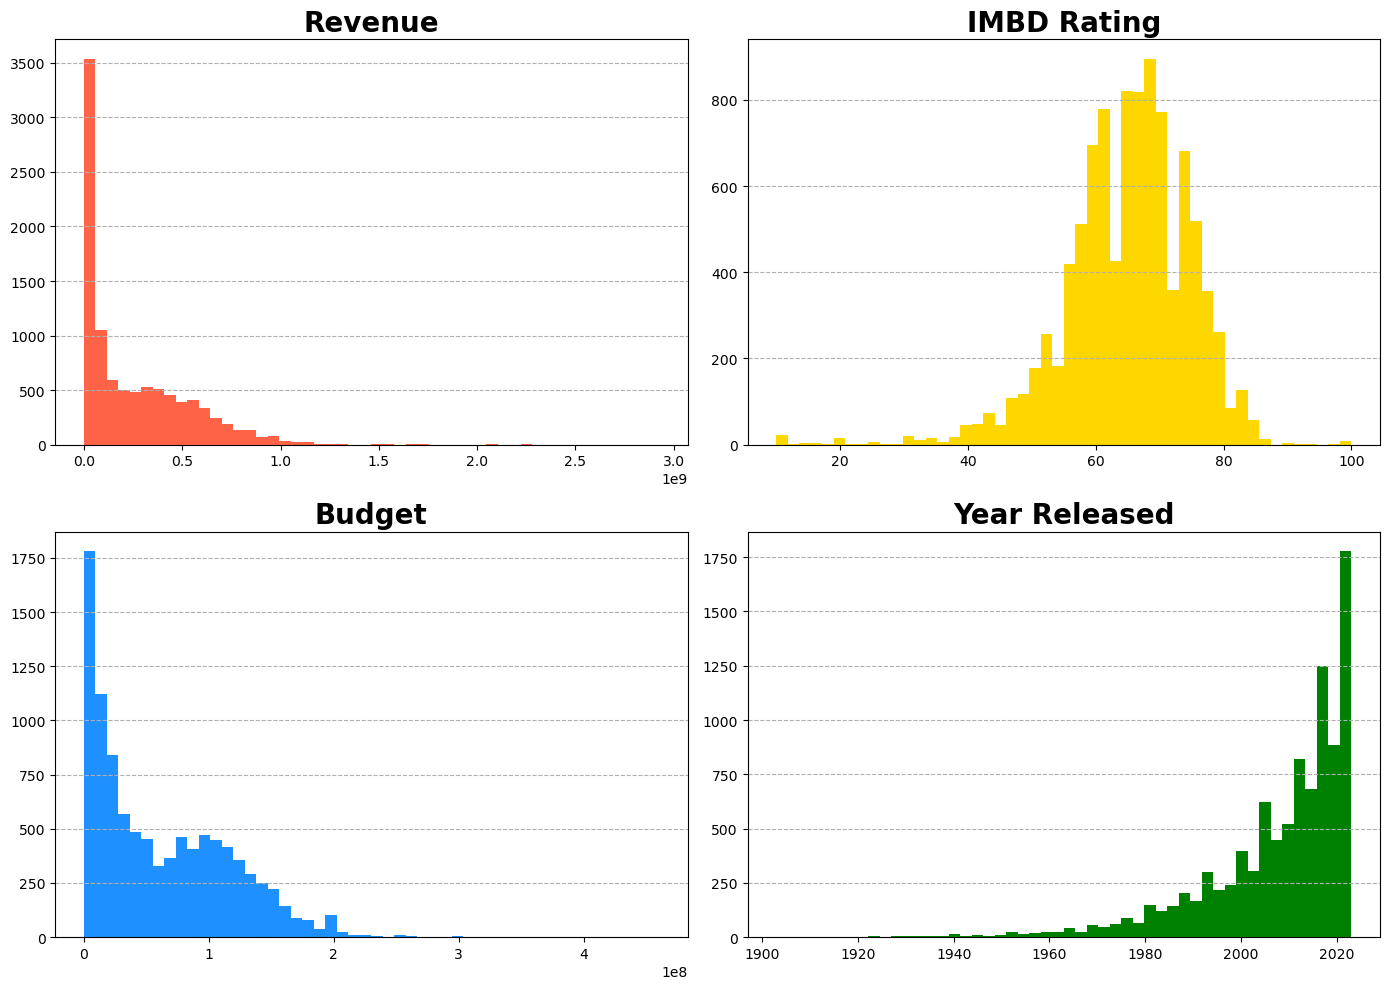

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14, 10))
his1= imdb_movies['score']
his2= imdb_movies['budget']
his3= imdb_movies['revenue']
his4= imdb_movies['release_date'].dt.year

#revenue
axes[0,0].hist(his3, bins=50, color='tomato')
axes[0,0].set_title('Revenue', fontsize=20, fontweight='bold')
axes[0,0].grid(axis='y', linestyle='--')

#score
axes[0,1].hist(his1, bins=50, color='gold')
axes[0,1].set_title('IMBD Rating', fontsize=20, fontweight='bold')
axes[0,1].grid(axis='y', linestyle='--')

#budget
axes[1,0].hist(his2, bins=50, color='dodgerblue')
axes[1,0].set_title('Budget', fontsize=20, fontweight='bold')
axes[1,0].grid(axis='y', linestyle='--')

#release_year
axes[1,1].hist(his4, bins=50, color='green')
axes[1,1].set_title('Year Released', fontsize=20, fontweight='bold')
axes[1,1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

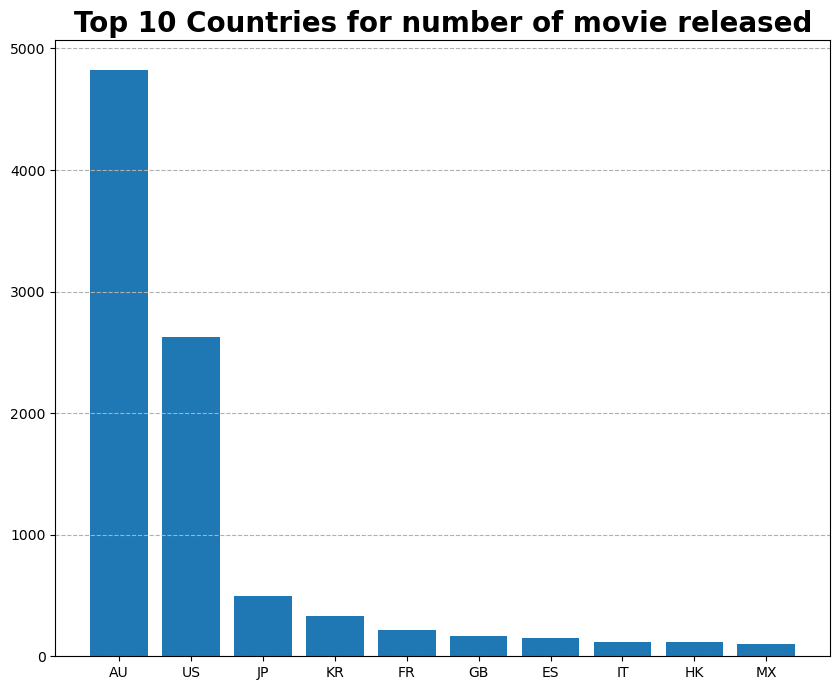

In [14]:
top_countries = imdb_movies["country"].value_counts().head(10)
plt.figure(figsize=(10,8))
plt.bar(top_countries.index, top_countries)
plt.title('Top 10 Countries for number of movie released', fontsize=20, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.show()

/var/folders/57/8yr9qn3s45sc5vk_srfp2yv80000gn/T/ipykernel_17548/578401133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')


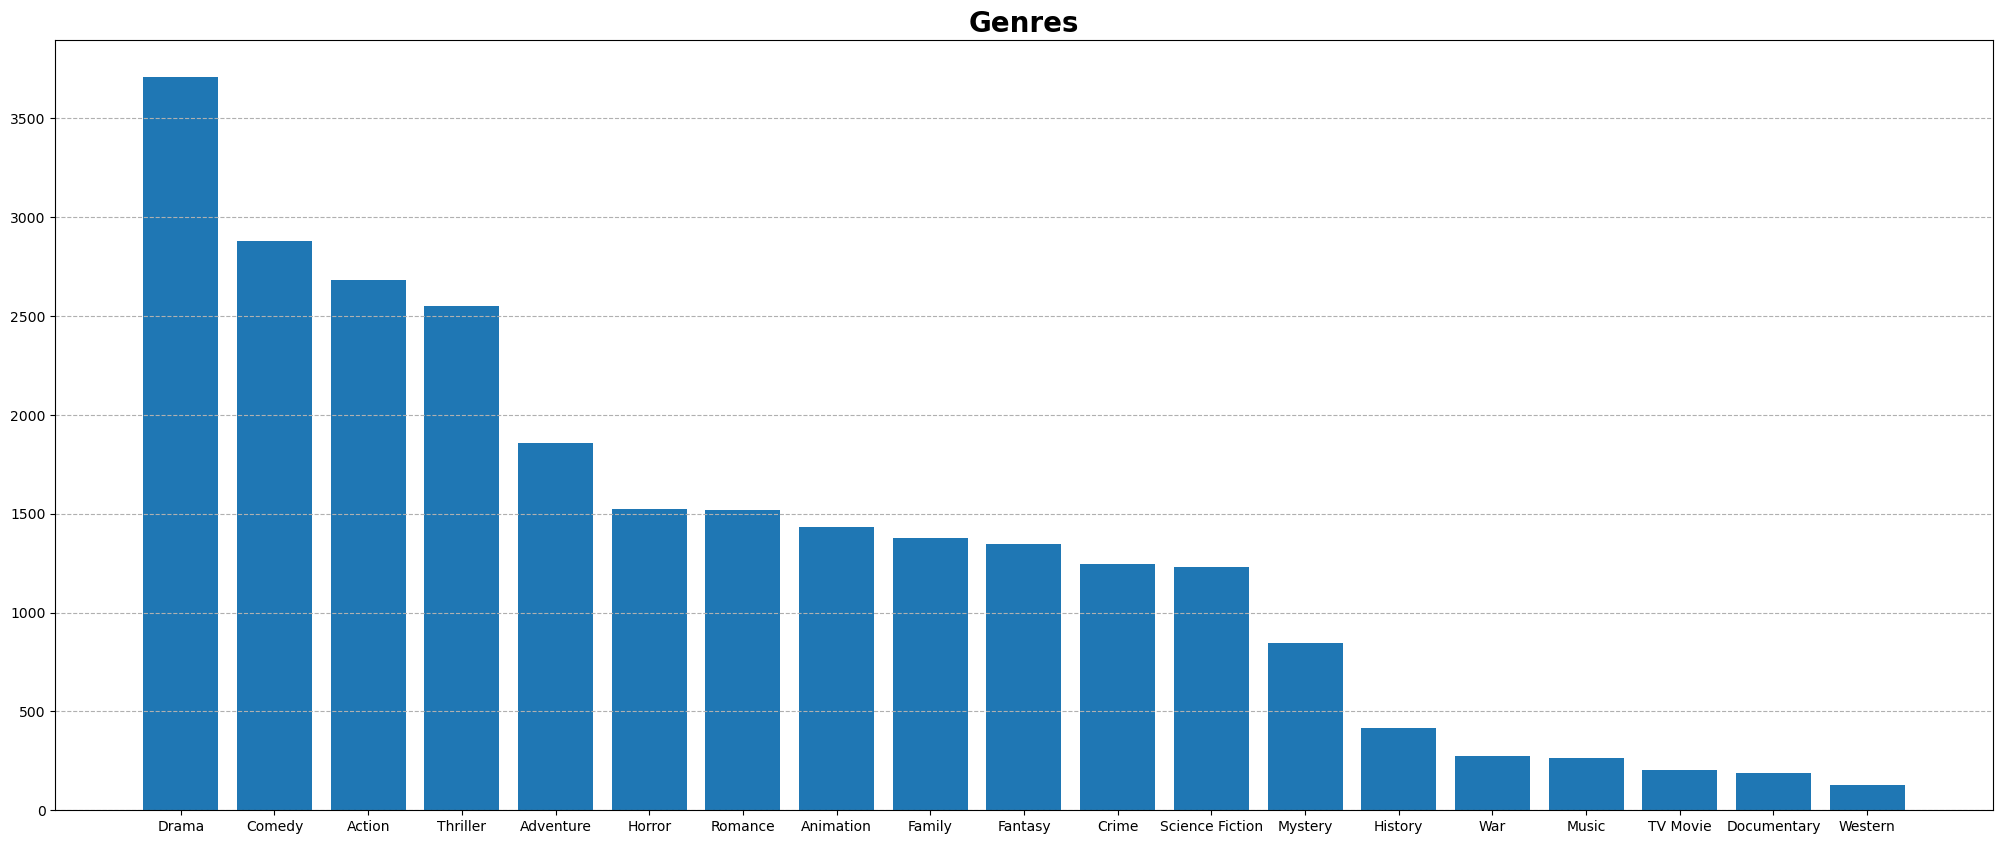

In [15]:
imdb_genres = imdb_movies[['names', 'genre', 'score']]
imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')
imdb_genres = imdb_genres.explode('genre').reset_index(drop=True)
genre_counts = imdb_genres['genre'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(genre_counts.index, genre_counts)
plt.title('Genres', fontsize=20, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.show()

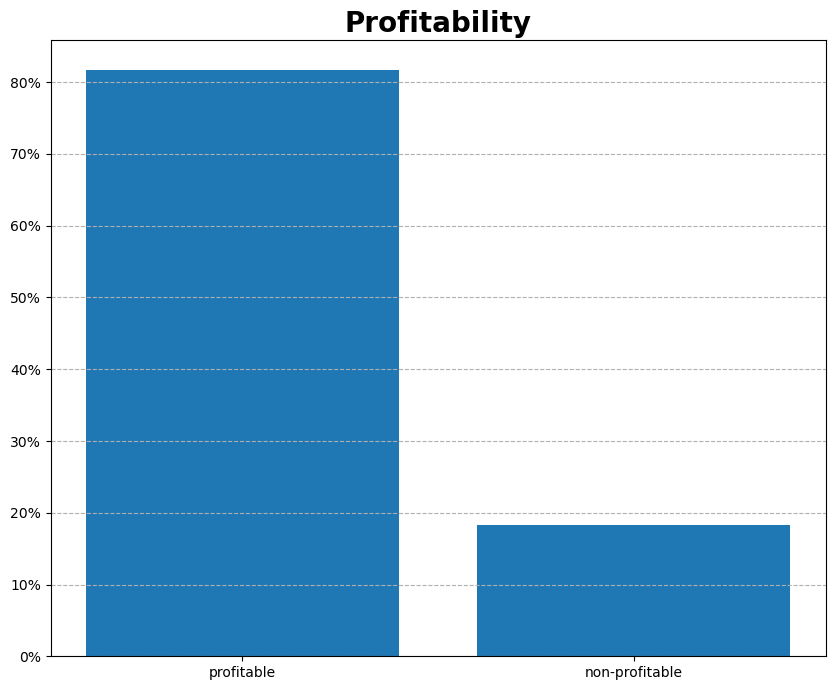

In [16]:
from matplotlib.ticker import PercentFormatter

profitability = imdb_movies.apply(lambda row: 'profitable' if row['revenue'] - row['budget'] > 0 else 'non-profitable', axis=1)
profitability = profitability.value_counts(normalize=True)
plt.figure(figsize=(10,8))
plt.bar(profitability.index, profitability)
plt.title('Profitability', fontsize=20, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

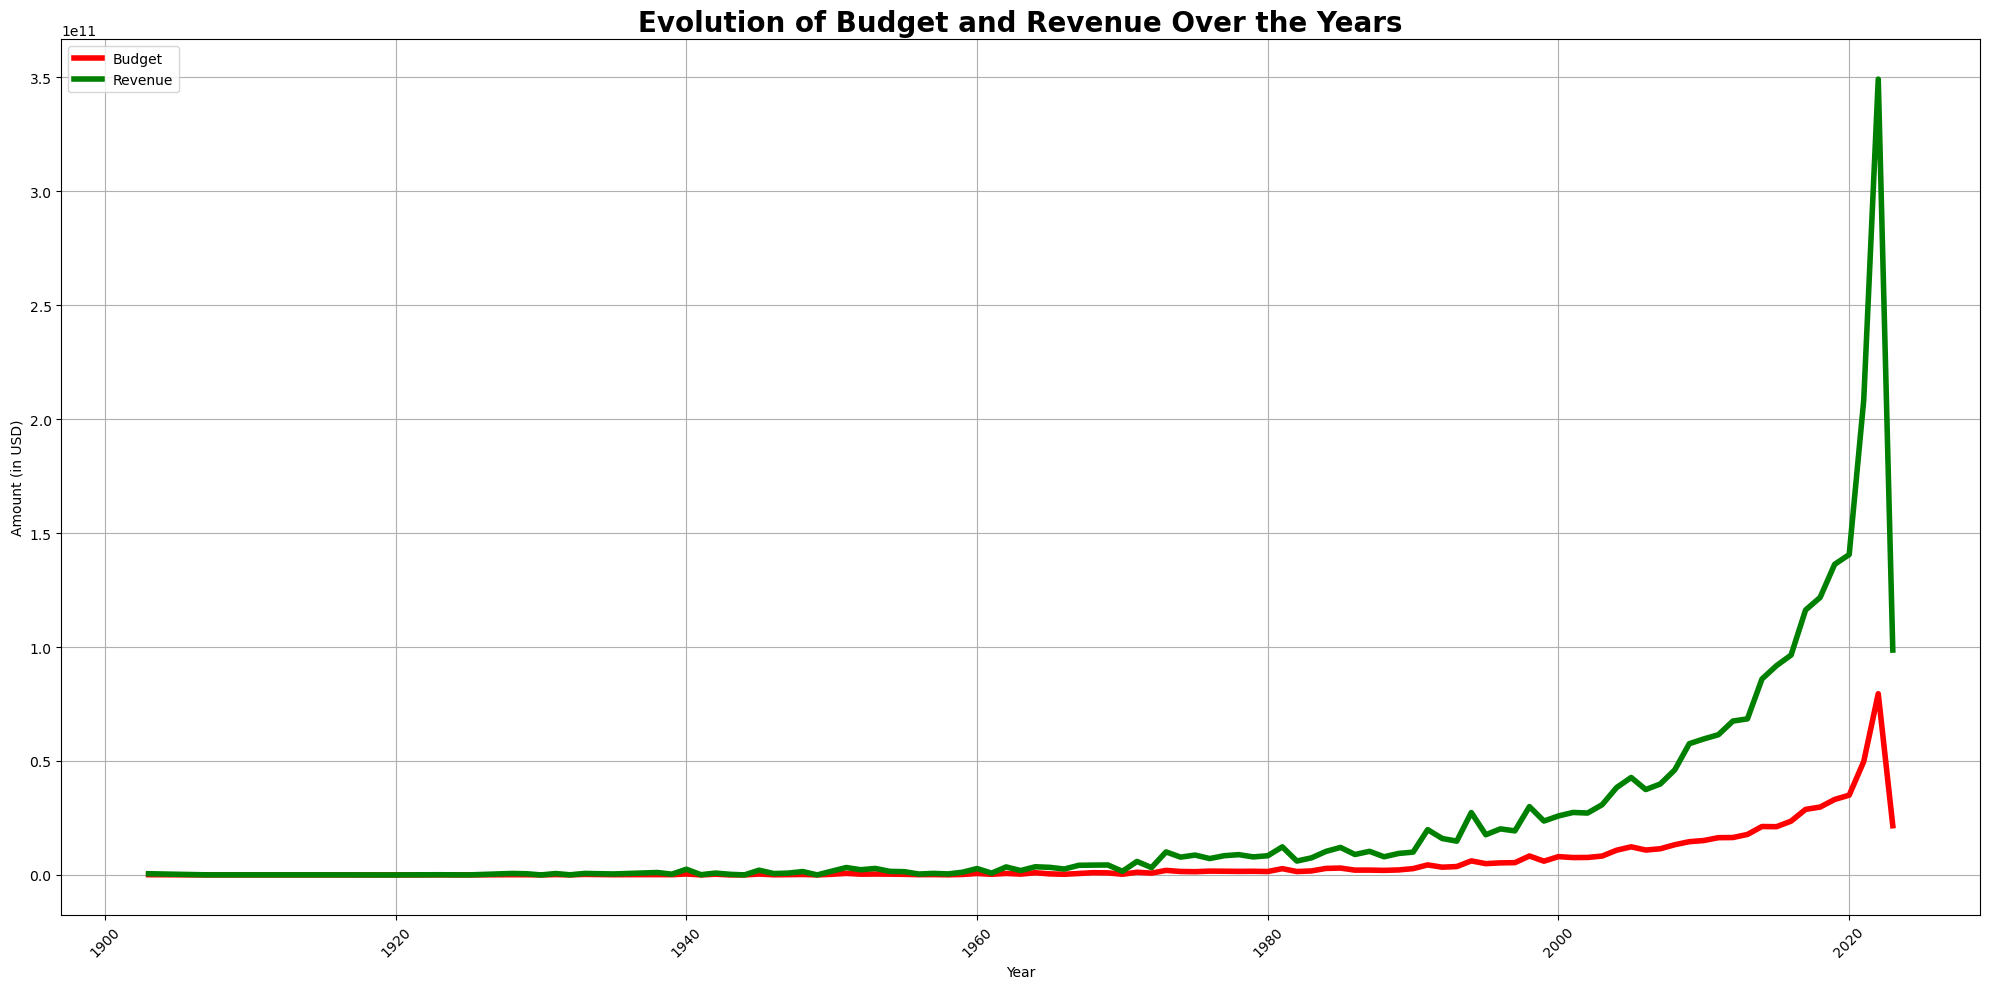

In [17]:
temp = imdb_movies.copy()
temp['year'] = pd.to_datetime(temp['release_date']).dt.year

yearly_data = temp.groupby('year')[['budget', 'revenue']].sum()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(yearly_data.index, yearly_data['budget'], label='Budget', color='red', linewidth=4)
ax.plot(yearly_data.index, yearly_data['revenue'], label='Revenue', color='green', linewidth=4)

ax.set_title('Evolution of Budget and Revenue Over the Years', fontsize=20, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Amount (in USD)')
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
temp.groupby('year').count()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
year,,,,,,,,,,,,,
1903,1,1,1,1,1,1,1,1,1,1,1,1,1
1907,1,1,1,1,1,1,1,1,1,1,1,1,1
1915,2,2,2,2,2,2,2,2,2,2,2,2,2
1920,1,1,1,1,1,1,1,1,1,1,1,1,1
1923,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,450,450,450,450,450,450,450,450,450,450,450,450,450
2020,435,435,435,435,435,435,435,435,435,435,435,435,435
2021,607,607,607,607,607,607,607,607,607,607,607,607,607


In [19]:
imdb_movies.sort_values('release_date', ascending=False)

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
1281,"La Usurpadora, the Musical",2023-12-31,90.0,"Music, Comedy, Drama","Two identical twin sisters, separated at birth...","Isabella Castillo, Valeria / Victoria, Alan Es...","La Usurpadora, El Musical",Released,"Spanish, Castilian",254000000.0,1.656280e+09,MX,1
9664,Simulant,2023-06-02,100.0,"Science Fiction, Thriller",Faye attempts to replace her newly deceased hu...,"Robbie Amell, Evan, Jordana Brewster, Faye, Si...",Hello Stranger,Released,English,201000000.0,1.569324e+09,US,1
518,Renfield,2023-05-25,83.0,"Comedy, Horror, Fantasy",Having grown sick and tired of his centuries a...,"Nicholas Hoult, R.M. Renfield, Nicolas Cage, C...",Renfield,Released,English,86203077.0,1.207640e+07,AU,0
1882,Infinity Pool,2023-05-11,65.0,"Horror, Science Fiction, Thriller","While staying at an isolated island resort, Ja...","Alexander Skarsgård, James Foster, Mia Goth, G...",Infinity Pool,Released,English,4500000.0,5.078400e+06,AU,1
779,November,2023-05-11,73.0,"Thriller, Crime, Drama","In November 2015, a series of unprecedented an...","Jean Dujardin, Fred, Anaïs Demoustier, Inès, S...",Novembre,Released,French,250000.0,1.918620e+05,AU,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,The Cabinet of Dr. Caligari,1920-02-27,80.0,"Drama, Horror, Thriller, Crime","Francis, a young man, recalls in his memory th...","Werner Krauß, Dr. Caligari, Conrad Veidt, Cesa...",Das Cabinet des Dr. Caligari,Released,German,18000.0,8.811000e+03,DE,0
9167,The Birth of a Nation,1915-02-08,61.0,"Drama, History, War","Two families, abolitionist Northerners the Sto...","Lillian Gish, Stoneman's Daughter Elsie, Mae M...",The Birth of a Nation,Released,English,10000000.0,1.689101e+07,US,1
9168,The Birth of a Nation,1915-02-08,61.0,"Drama, History, War","Two families, abolitionist Northerners the Sto...","Lillian Gish, Stoneman's Daughter Elsie, Mae M...",The Birth of a Nation,Released,English,110000.0,1.100000e+07,US,1
7146,A Trip to the Moon,1907-06-20,80.0,"Adventure, Science Fiction",Professor Barbenfouillis and five of his colle...,"Georges Méliès, Professor Barbenfouillis / The...",Le Voyage dans la Lune,Released,French,5985.0,3.996247e+07,AU,1


We have a drop in 2023 for total budget and revenue because our data finish with movies released in June 2023.
(Don't know why there's one released on 31-12-2023)

### Budget

<a id="budget"></a>

In [20]:
imdb_movies['budget'].describe()

count    9.793000e+03
mean     6.243951e+07
std      5.421382e+07
min      2.000000e+03
25%      1.450000e+07
50%      5.000000e+07
75%      1.020000e+08
max      4.600000e+08
Name: budget, dtype: float64

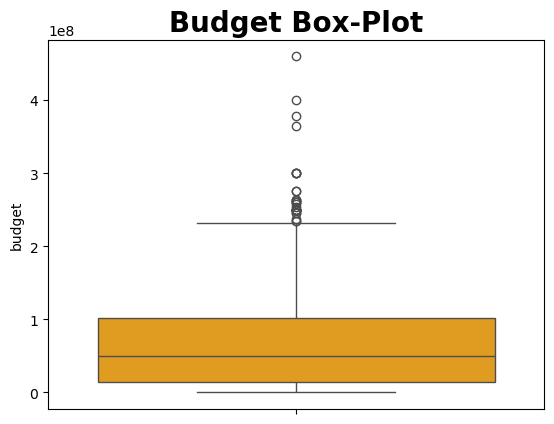

In [21]:
sns.boxplot(y=imdb_movies['budget'], color='orange')
plt.title('Budget Box-Plot', fontsize=20, fontweight='bold')
plt.show()


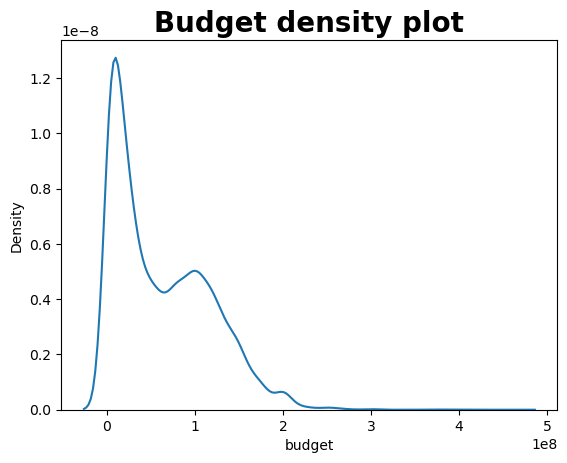

In [22]:
sns.kdeplot(imdb_movies['budget'])
plt.title('Budget density plot', fontsize=20, fontweight='bold')
plt.show()

In [23]:
# skewness

from scipy.stats import skew 
from scipy.stats import kurtosis 

print('skewness:', str(skew(imdb_movies['budget'], axis=0, bias=True)))
print('kurtosis:', str(kurtosis(imdb_movies['budget'], axis=0, bias=True)))

skewness: 0.831392632835075
kurtosis: 0.3804951052592074


relatively low values, so no trasformation needed

### Score

<a id="score"></a>


In [24]:
imdb_movies['score'].describe()

count    9793.000000
mean       64.889717
std         9.884499
min        10.000000
25%        60.000000
50%        66.000000
75%        72.000000
max       100.000000
Name: score, dtype: float64

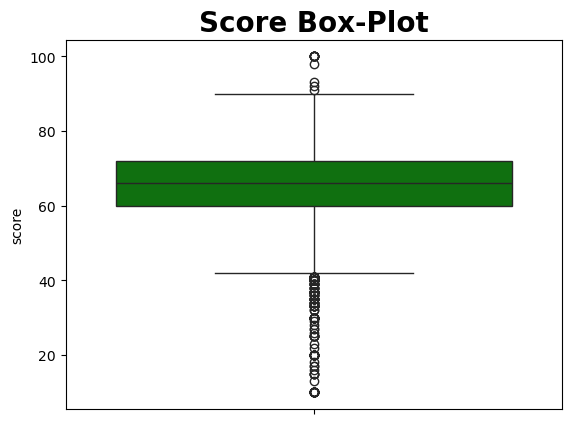

In [25]:
sns.boxplot(y=imdb_movies['score'], color='green')
plt.title('Score Box-Plot', fontsize=20, fontweight='bold')
plt.show()

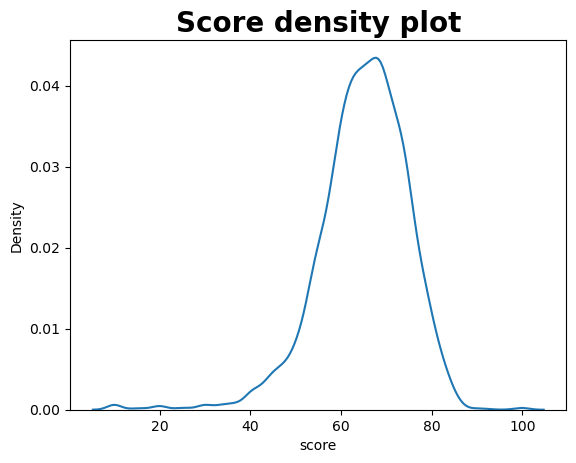

In [26]:
sns.kdeplot(imdb_movies['score'])
plt.title('Score density plot', fontsize=20, fontweight='bold')
plt.show()

In [27]:
# skewness

from scipy.stats import skew 
from scipy.stats import kurtosis 

print('skewness:', str(skew(imdb_movies['score'], axis=0, bias=True)))
print('kurtosis:', str(kurtosis(imdb_movies['score'], axis=0, bias=True)))

skewness: -1.0269619419574665
kurtosis: 3.406435353950447


### genre
<a id="genre"></a>


In [28]:

imdb_genres = imdb_movies[['names', 'genre', 'score']]
imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')
imdb_genres = imdb_genres.explode('genre').reset_index(drop=True)
imdb_genres

/var/folders/57/8yr9qn3s45sc5vk_srfp2yv80000gn/T/ipykernel_17548/1457673940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')


,names,genre,score
0,Creed III,Drama,73.0
1,Creed III,Action,73.0
2,Avatar: The Way of Water,Science Fiction,78.0
3,Avatar: The Way of Water,Adventure,78.0
4,Avatar: The Way of Water,Action,78.0
...,...,...,...
25683,Darkman II: The Return of Durant,Thriller,55.0
25684,Darkman II: The Return of Durant,Horror,55.0
25685,The Swan Princess: A Royal Wedding,Animation,70.0
25686,The Swan Princess: A Royal Wedding,Family,70.0


In [29]:
imdb_genres.groupby('genre')['score'].agg(['max', 'min', 'mean'])

,max,min,mean
genre,,,
Action,85.0,23.0,64.489758
Adventure,85.0,15.0,65.874194
Animation,86.0,30.0,69.504530
Comedy,100.0,15.0,64.640180
Crime,90.0,25.0,65.827586
Documentary,93.0,20.0,68.930851
Drama,100.0,10.0,67.066307
Family,85.0,30.0,66.587509
Fantasy,86.0,15.0,66.395849


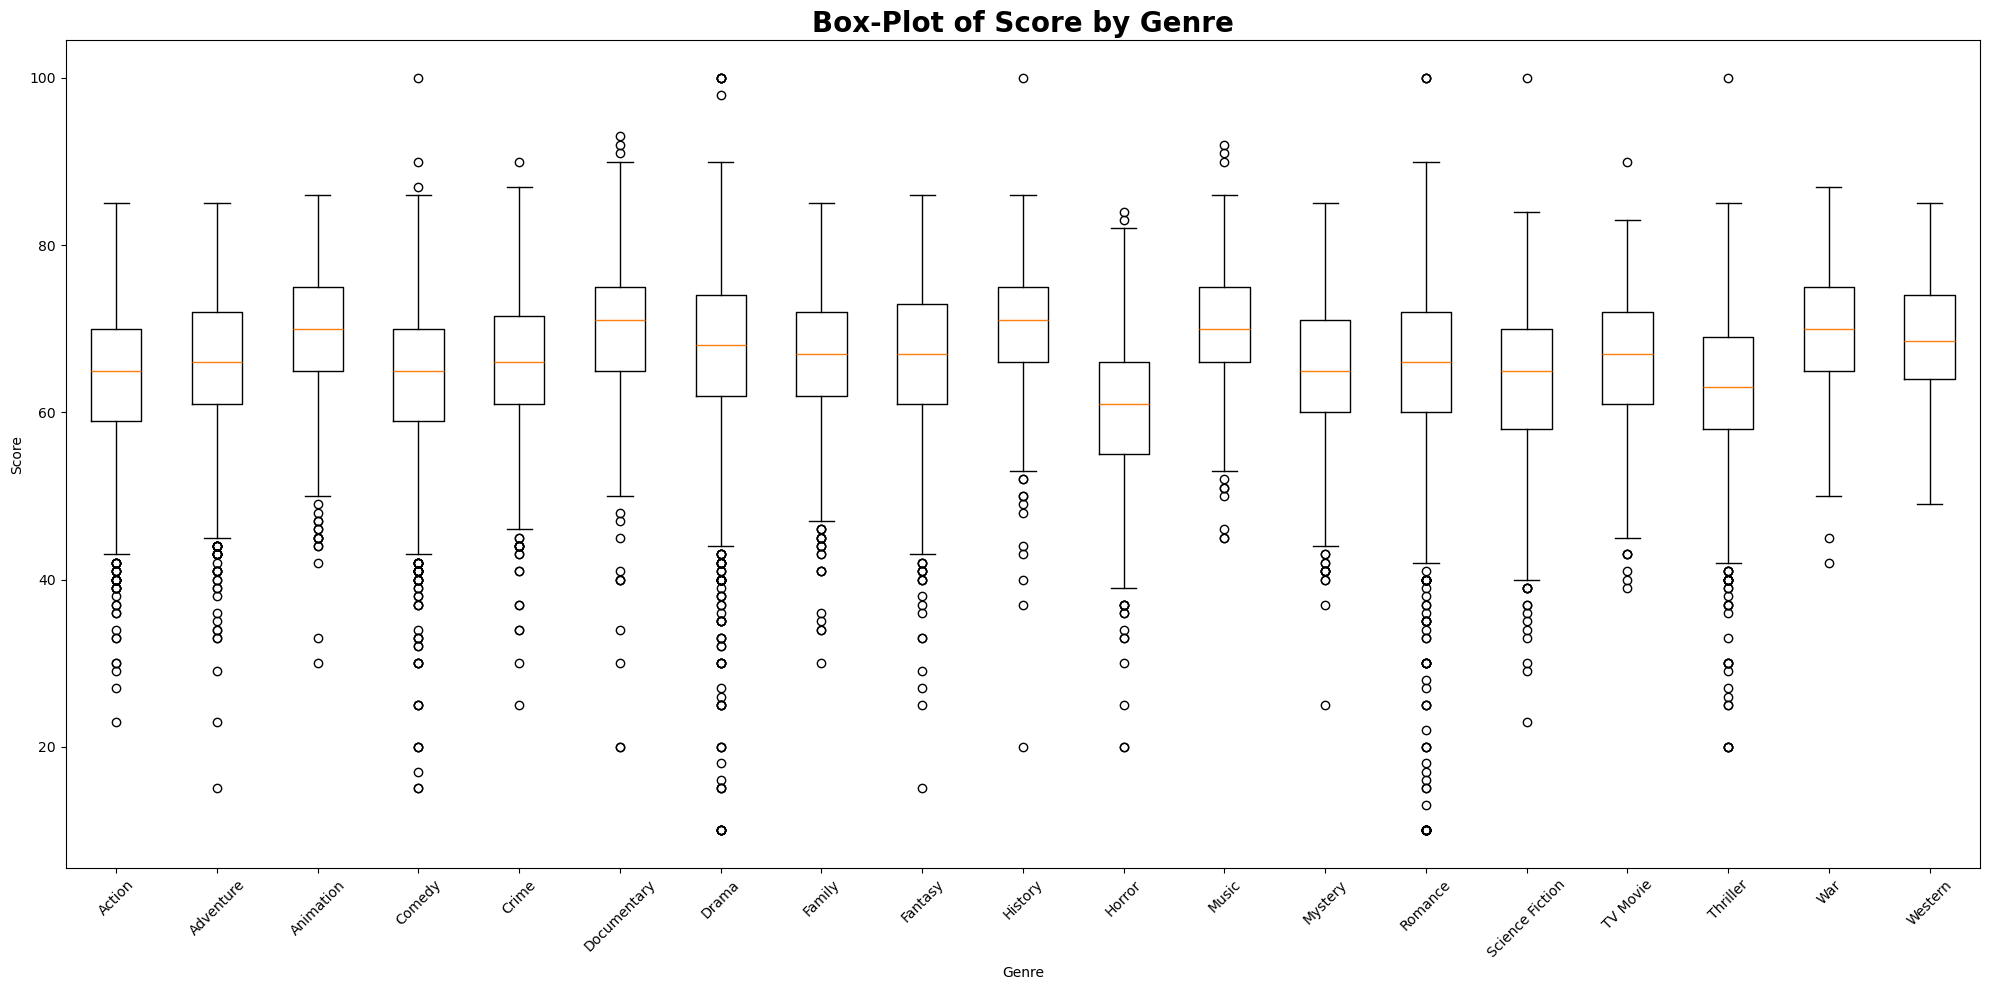

In [30]:
#boxplot 

#data preparation for boxplot
grouped_genres = imdb_genres.groupby('genre')['score'].apply(list) 
genres_list = grouped_genres.index.tolist()
genres_data_to_plot = [grouped_genres[genre] for genre in genres_list]

#boxplot preparation
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(genres_data_to_plot, labels=genres_list)
ax.set_xlabel('Genre')
ax.set_ylabel('Score')
plt.title('Box-Plot of Score by Genre', fontsize=20, fontweight='bold')
plt.xticks(rotation = 45)
plt.tight_layout()



<Axes: xlabel='genre'>

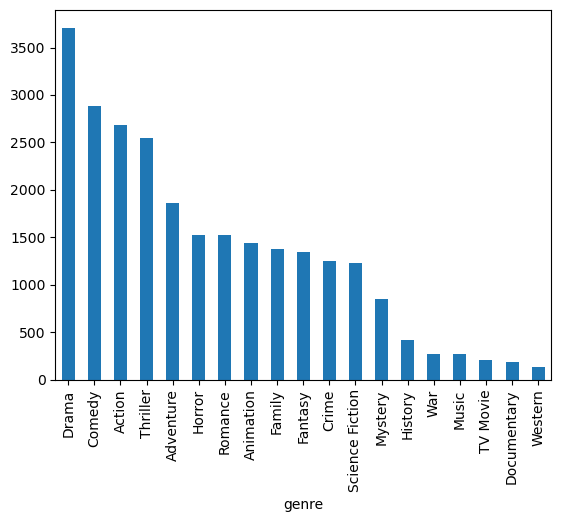

In [31]:
genre_counts = imdb_genres['genre'].value_counts()
genre_counts.plot(kind = 'bar')

## Correlations Analysis
<a id="correlations-analysis"></a>

### Correlation Matrix
<a id="correlation-matrix"></a>

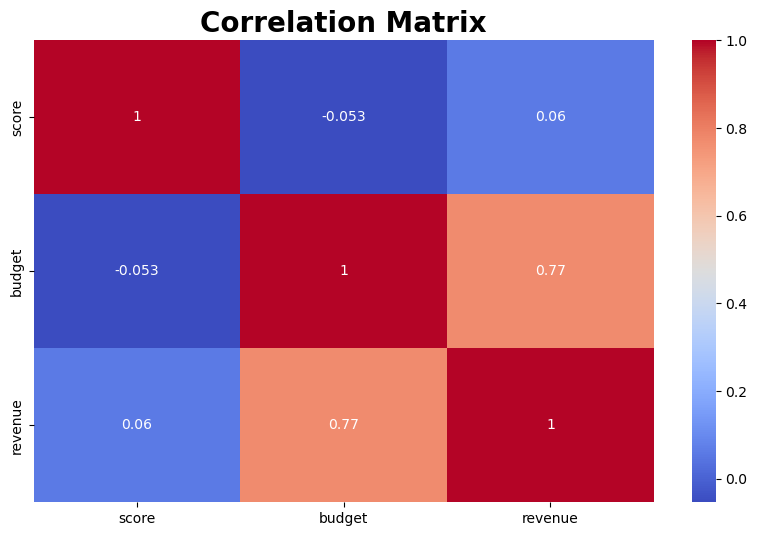

In [32]:
corr = imdb_movies[['score', 'budget','revenue']].corr(method='spearman')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=20, fontweight='bold')
plt.show()


### Score and Budget
<a id="score-and-budget"></a>


<Axes: xlabel='budget', ylabel='score'>

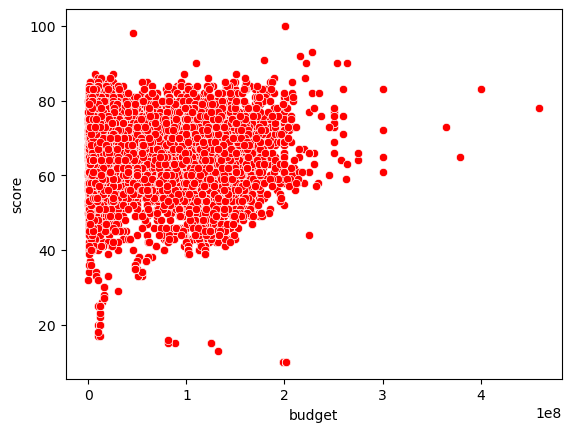

In [33]:
sns.scatterplot(y=imdb_movies['score'], x=imdb_movies['budget'], color='red')

In [34]:
imdb_movies[['budget', 'score']].cov()

,budget,score
budget,2.939138e+15,-2.420404e+07
score,-2.420404e+07,9.770332e+01


In [35]:
imdb_movies[['score', 'budget']].corr(method='pearson')

,score,budget
score,1.000000,-0.045167
budget,-0.045167,1.000000


In [36]:
imdb_movies[['score', 'budget']].corr(method='spearman')

,score,budget
score,1.000000,-0.053489
budget,-0.053489,1.000000


it seems we have a low correlation between the two variables

### Profitability and Score
<a id="profitability-and-score"></a>


In [37]:
stats.pointbiserialr(imdb_movies['profitable'], imdb_movies['score'])

SignificanceResult(statistic=0.081666832246227, pvalue=5.76386472215221e-16)

<Axes: xlabel='score', ylabel='profitable'>

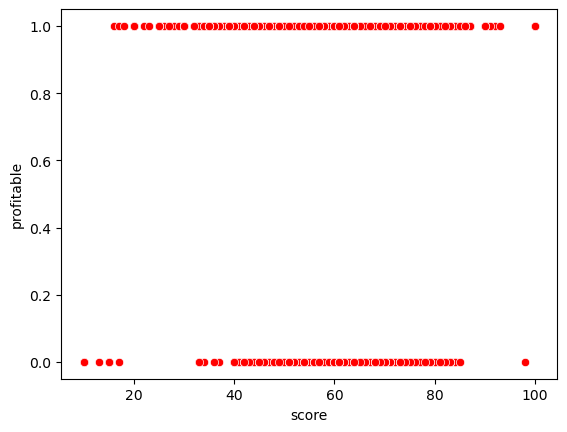

In [38]:
sns.scatterplot(y=imdb_movies['profitable'], x=imdb_movies['score'], color='red')

<Axes: xlabel='score', ylabel='Count'>

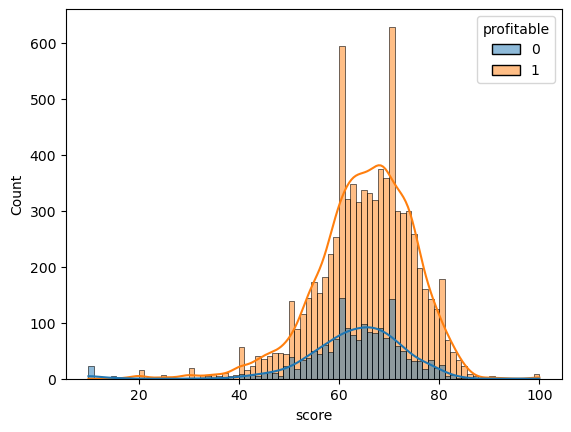

In [39]:
# histogram and density plots
sns.histplot(data=imdb_movies, x=imdb_movies['score'], hue=imdb_movies['profitable'], kde=True)

relatively weak positive correlation

generally, higher rated movies tend to break even more often

### Profitability and budget
<a id="profitability-and-budget"></a>


In [40]:
stats.pointbiserialr(imdb_movies['profitable'], imdb_movies['budget'])

SignificanceResult(statistic=0.2528129476139182, pvalue=1.1979688151982195e-142)

<Axes: xlabel='budget', ylabel='profitable'>

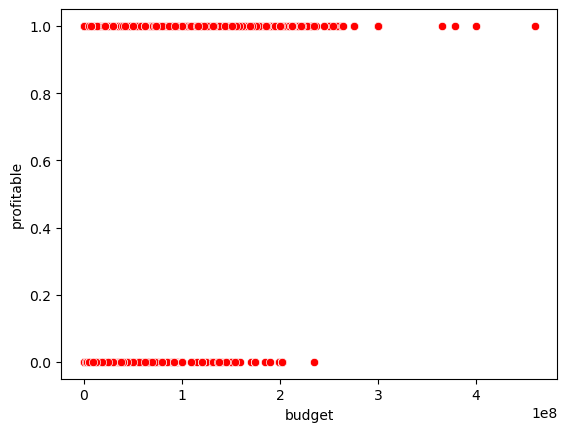

In [41]:
sns.scatterplot(y=imdb_movies['profitable'], x=imdb_movies['budget'], color='red')

<Axes: xlabel='budget', ylabel='Count'>

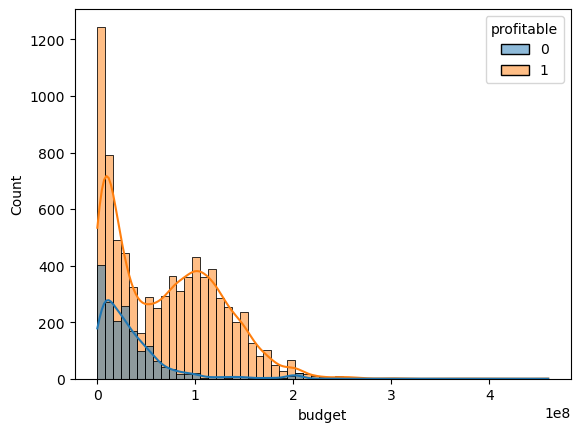

In [42]:
# histogram and density plots
sns.histplot(data=imdb_movies, x=imdb_movies['budget'], hue=imdb_movies['profitable'], kde=True)

relatively weak positive correlation

generally, passed the 50 milion budget, it is more probable to make a profitable movie

# Method 1
<a id="method-1"></a>


**Research Question 1**: is the IMDB score for a movie really not dependent on its production budget?

We will test the follwing hypothesis set:

- null hypothesis $H_0 : \beta_1 \gt 0$
- alternative hypothesis $H_1 : \beta_1 \leq 0$



## Regression Model 
<a id="regression-model"></a>


we will start by fitting a linear regression model to our dataset \
the model can be expressed as:

$ \text{score} = \beta_0 + \beta_1 \cdot \text{budget} + \epsilon $


In [43]:

# Fit the linear regression model
model = smf.ols(formula='score ~ budget', data=imdb_movies)
results = model.fit()

# Display the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.02
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           7.77e-06
Time:                        21:02:13   Log-Likelihood:                -36321.
No. Observations:                9793   AIC:                         7.265e+04
Df Residuals:                    9791   BIC:                         7.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4039      0.152    429.701      0.0

<u>**Interpretation of the results**</u>

**Coefficients:**
- Intercept: $\beta_0 = 65.4039$ \
    this suggests that, on average movies would have a score of roughly 65, when having no budget
- Budget: $\beta_1 = -8.235 \cdot 10^{-9}$ \
    this coefficient suggests that, for every addition dollar in budget, the movie scores decreases by $-8.235 \cdot 10^{-9}$ dollar, which is very close to 0

**p-value** $(P> |t|)$**:**
- For the budget coefficient, the p-value is $0.000$. This means the relationship between budget and IMDb score is statistically significant at common significance levels (like $0.05$ or $0.01$), meaning that we can reject the null hypothesis that $\beta_1 \gt 0$
- A negative coefficient, combined with the small p-value, suggests that there is a significant negative relationship between budget and IMDb score.

**R-squared:** 
- The R-squared value is $0.002$, which indicates that only $0.2\%$ of the variation in IMDb scores is explained by the production budget. This is a very small proportion, meaning budget alone is not a good predictor of IMDb scores.

**F-statistic and Prob(F-statistics):**
- The F-statistic is $20.02$ with a corresponding p-value of $7.77 \cdot 10^{-6}$. This indicates that the model as a whole is statistically significant, though, given the low R-squared, this significance may not imply practical importance.

\
<u>**Additional considerations:**</u>

**Condition Number:** $1.26 \cdot 10^8$
- A high condition number may potentially indicate <u>multicollinarity</u> in the model.
- Let's procede with the check of the model's assumption...


## Checking model assumptions:
<a id="checking-model-assumptions"></a>


Let us procede to check our model's assumptions:


### Linearity
<a id="linearity"></a>


In [44]:
# making predictions
pred_insample = results.predict() # or results.fittedvalues

# out of sample prediction
pred_outofsample = results.predict(imdb_movies)


# add predictions to the data frame
imdb_movies['predictions'] = results.predict()
imdb_movies['residuals'] = results.resid # computing residuals (i.e., actual - predicted values)
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable,predictions,residuals
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1,64.786280,8.213720
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1,61.615774,16.384226
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1,64.580403,11.419597
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1,65.302620,4.697380
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1,64.769810,-3.769810


Text(0.5, 1.0, 'Actual vs. Predicted')

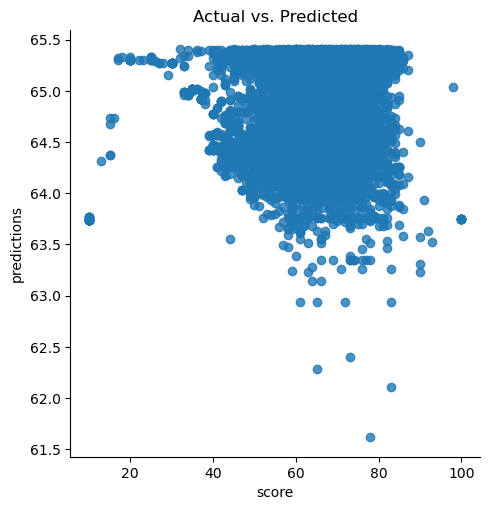

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
sns.lmplot(x = "score", y = "predictions", data = imdb_movies, fit_reg = False)        
plt.title("Actual vs. Predicted")

<u>**Interpretation:**</u>

The scatter plot above shows that the predictions from our linear regression model are clustered around a constant value (~65), with little variation in response to the actual IMDb scores. This indicates that the model is not capturing a meaningful relationship between the production budget and the IMDb score. 

**Conclusions**
- We can reject the null hypothesis based on the statistical significance of the budget coefficient.
- However, the model's poor predictive power (low R-squared) and near-constant predictions suggest that budget alone is not a strong predictor of IMDb scores.


### Homoscedacity
<a id="homoscedasticity"></a>


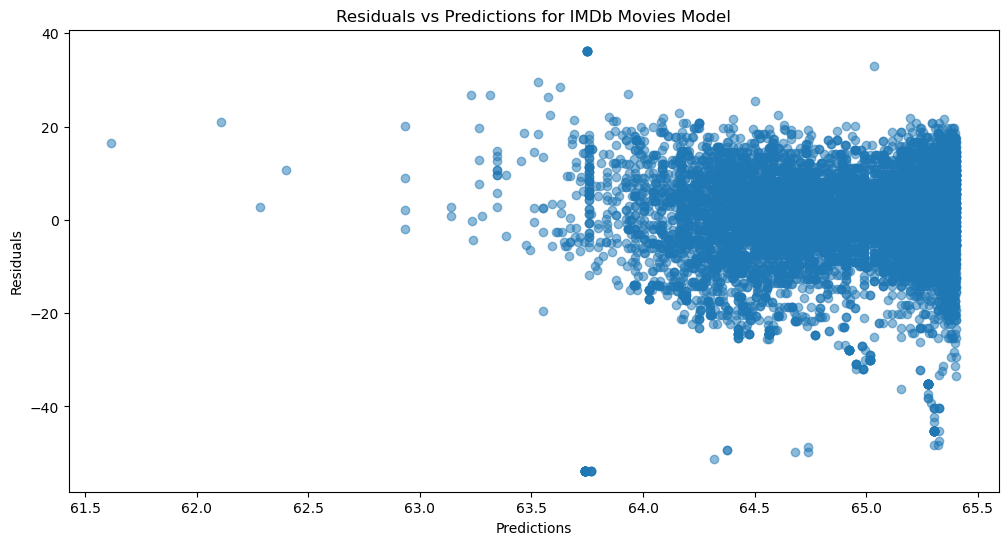

In [46]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
plt.scatter(x = imdb_movies.predictions, y = imdb_movies.residuals, alpha = 0.5)
plt.title('Residuals vs Predictions for IMDb Movies Model')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

<u>**Residuals Plot Interpretation:**</u>

The residuals plot above shows the distribution of residuals (errors) as a function of the predicted IMDb scores. For homoscedasticity (constant variance of residuals), we expect the residuals to be evenly spread across the range of predictions. 

- **Heteroscedasticity**: The residuals are not evenly spread and appear more concentrated around predictions between 64 and 65. This "fan shape" suggests heteroscedasticity, meaning the variance of residuals changes across different prediction values. This violates one of the assumptions of linear regression, indicating that the model's performance might be biased for certain ranges of predicted IMDb scores.
  


#### Homoscedasticity robust errors
<a id="homoscedasticity-robust-errors"></a>


Let us adjust for heteroscedasticity in the model using heteroscedasticity robust stanndard errors (HC3):

In [47]:
# Fit the linear regression model
model = smf.ols(formula= 'score ~ budget', data = imdb_movies) # using heteroscedasticity robust standard errors
results = model.fit(cov_type = "HC3")

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.61
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           0.000385
Time:                        21:02:14   Log-Likelihood:                -36321.
No. Observations:                9793   AIC:                         7.265e+04
Df Residuals:                    9791   BIC:                         7.266e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4039      0.160    407.534      0.0

<u>**Interpretation of the Results (with Heteroscedasticity-Robust Errors):**</u>

**Coefficients:**
- **Intercept**: $\beta_0 = 65.4039$ \
    The intercept remains the same, indicating that, on average, movies would have a score of approximately 65 when the budget is zero.
- **Budget**: $\beta_1 = -8.235 \cdot 10^{-9}$ \
    The budget coefficient still suggests that for every additional dollar spent on the movie, the IMDb score decreases by $-8.235 \cdot 10^{-9}$, which is a very small effect, close to 0.

**p-value** $(P> |z|)$**:**
- The p-value for the budget coefficient is $0.000$, indicating that the relationship between budget and IMDb score is statistically significant at conventional significance levels (e.g., $0.05$ or $0.01$). 
- This allows us to reject the null hypothesis that $\beta_1 > 0$. However, the negative coefficient suggests a small but significant negative relationship between budget and IMDb score, meaning higher budgets are associated with slightly lower IMDb scores.

**R-squared:** 
- The R-squared value remains $0.002$, indicating that only $0.2\%$ of the variation in IMDb scores is explained by the production budget. This suggests that budget is not a strong predictor of IMDb scores.

**F-statistic and Prob(F-statistic):**
- The F-statistic has changed to $12.61$ with a p-value of $3.85 \cdot 10^{-4}$ after using heteroscedasticity-robust standard errors. This still shows that the model is statistically significant, but the low R-squared still suggests that the significance does not imply practical predictive value.

\
<u>**Additional Considerations:**</u>

**Robust Standard Errors:**
- The use of heteroscedasticity-robust standard errors (HC3) adjusts the standard errors to account for non-constant variance (heteroscedasticity) in the residuals. This ensures more reliable statistical inference, especially the p-values and confidence intervals.

**Condition Number:** $1.26 \cdot 10^8$
- The high condition number still suggests potential multicollinearity or numerical issues in the model. Despite addressing heteroscedasticity, this large value indicates further model refinement may be necessary.


### Normaility of residuals
<a id="normality-of-residuals"></a>


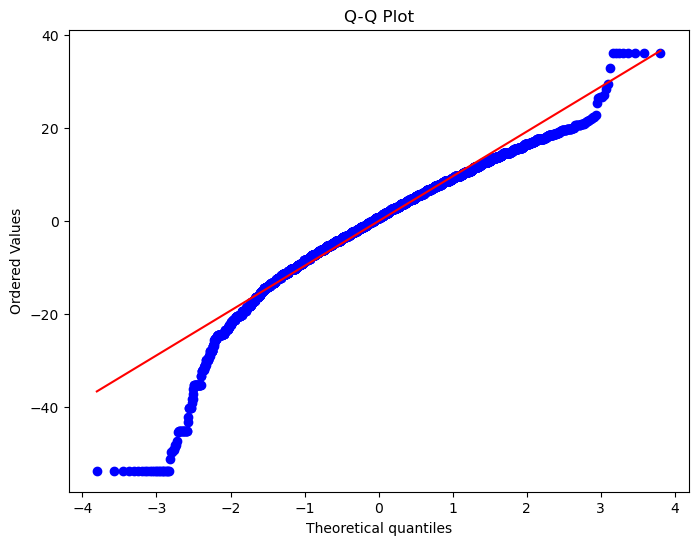

In [48]:
import scipy.stats as stats

# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(imdb_movies['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

<u>**Interpretation**</u>

- **Deviation from Normality**: The plot shows that the residuals deviate significantly from the line, particularly at the tails (extreme values), suggesting that the residuals are not normally distributed.
- **Heavy Tails**: There are clear departures from the red line at both the lower and upper ends, indicating the presence of extreme residuals (outliers). This suggests that the model may be experiencing issues with outliers or non-normal error terms.

### Multicollinearity
<a id="multicollinearity"></a>


In [49]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variables"] = results.model.exog_names
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)

   Variables  VIF Factor
0  Intercept     2.32661
1     budget     1.00000


<u>**Interpretation**</u>

**Observations:**
- **Intercept VIF**: The VIF for the intercept is $2.32661$, which is well below the commonly accepted threshold of $10$. This suggests that multicollinearity is not a significant issue in the model with respect to the intercept.
- **Budget VIF**: The VIF for the budget variable is exactly $1.00000$, indicating no multicollinearity. This means the budget variable is not correlated with any other variables in the model (which is expected given that budget is the only independent variable).

**Conclusion:**
- The VIF values for both the intercept and budget variables are low, indicating that multicollinearity is **not an issue** in this model.
- The high condition number reported earlier is not related to multicollinearity but could be due to other numerical issues, such as the scale of the budget variable.


### Autocorrelation
<a id="autocorrelation"></a>


In [50]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(imdb_movies['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 1.9426636988347077


<u>**Interpretation**</u>

- **Durbin-Watson Statistic**: The Durbin-Watson value is $1.9427$, which is very close to the ideal value of $2$. 

<u>**Conclusion**</u>

- The test statistic being close to 2 suggests that **autocorrelation is not a concern** in this model. This means the residuals are likely independent, which supports one of the key assumptions of the regression model.


## adjusting for assumptions?

# Method 2
<a id="method-2"></a>


**Research Question 2**: Does the movie profitability depend on the IMDb score?

We will test the following hypothesis set:

- null hypothesis $H_0 : \beta_1 = 0$
- alternative hypothesis $H_1 : \beta_1 \neq 0$

## Logistic Regression Model 
<a id="logistic-regression-model"></a>

We will start by fitting a logistic regression model to our dataset. \
The model can be expressed as:

$ \text{logit}(P(\text{profitable} = 1)) = \beta_0 + \beta_1 \cdot \text{score} $

Where:
- $P(\text{profitable} = 1)$ is the probability that a movie is profitable.
- The logistic function relates the IMDb score to the probability of profitability.

In [51]:
logit_model = smf.logit('profitable ~ score ', data= imdb_movies)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.472076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             profitable   No. Observations:                 9793
Model:                          Logit   Df Residuals:                     9791
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                0.006746
Time:                        21:02:14   Log-Likelihood:                -4623.0
converged:                       True   LL-Null:                       -4654.4
Covariance Type:            nonrobust   LLR p-value:                 2.294e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1985      0.163      1.220      0.222      -0.120       0.517
score          0.0202      0.

<u>**Interpretation of the Results**</u>

**Coefficients:**
- **Intercept**: $\beta_0 = 0.1985$ \
    This suggests that the log-odds of a movie being profitable is roughly $0.1985$ when the IMDb score is zero, though a score of zero is not realistic for movies.
- **IMDb Score**: $\beta_1 = 0.0202$ \
    This coefficient suggests that for every one-unit increase in IMDb score, the log-odds of a movie being profitable increase by $0.0202$. This means that higher IMDb scores are associated with higher probabilities of profitability.

**p-value** $(P>|z|)$**:**
- For the IMDb score coefficient, the p-value is $0.000$. This means that the relationship between IMDb score and movie profitability is statistically significant at conventional significance levels (such as $0.05$ or $0.01$). Therefore, we can reject the null hypothesis that $\beta_1 = 0$.
- The positive coefficient, combined with the small p-value, suggests that there is a significant positive relationship between IMDb score and profitability.

**Pseudo R-squared:** 
- The pseudo R-squared value is $0.006746$, indicating that only $0.6746\%$ of the variation in movie profitability is explained by the IMDb score. This is a very small proportion, meaning IMDb score alone is not a strong predictor of profitability.

**Log-Likelihood Ratio Test (LLR p-value):**
- The LLR p-value is $2.294 \cdot 10^{-15}$. This indicates that the model as a whole is statistically significant, meaning the inclusion of the IMDb score variable improves the model's fit over a null model.

\
<u>**Additional Considerations:**</u>

- The model has a very low pseudo R-squared, meaning that other factors likely have a larger impact on profitability. Adding more relevant predictors (e.g., marketing budget, genre, or release date) could improve the model's predictive power.

## Adding predictors Budget and Genre as Additional Predictors
<a id="adding-predictors-budget-and-genre"></a>


While the IMDb score has been shown to have a statistically significant relationship with profitability, the very low pseudo R-squared suggests that the model explains only a small portion of the variability in movie profitability. To improve the predictive power of the model, it makes sense to include other relevant variables that may affect profitability, such as **budget** and **genre**.

**Budget**  
- Budget plays a significant role in determining movie success. Larger budgets can lead to higher production quality, more prominent marketing campaigns, and wider releases, all of which are factors that may increase profitability.  
- Budget can be included in the model directly as a continuous variable, similar to how we handled IMDb score.

**Genre**  
- Genre influences the target audience and box office potential of a movie. Some genres, like action or family films, often have broader appeal, while others may cater to niche audiences. Different genres can lead to varying levels of profitability.
- Genre is a **categorical variable**, meaning it cannot be directly included in a regression model. To incorporate genre, we will create **dummy variables**.

In [52]:
# resetting indexes of the dataframe
imdb_movies.reset_index()

#string manipulation to prepare for genre's dummy columns
imdb_movies['genre'] = imdb_movies['genre'].fillna('')
imdb_movies['genre'] = imdb_movies['genre'].str.strip()
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r'\s+', ' ', regex=True)
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r',\s*', ',', regex=True)
imdb_movies['genre'] = imdb_movies['genre'].str.replace(' ', '_')

#split into lists and strip the single elements
imdb_movies['genre'] = imdb_movies['genre'].str.split(',')
imdb_movies['genre'] = imdb_movies['genre'].apply(lambda genres: [genre.strip() for genre in genres if genre])



In [53]:
#creating dummy_variables 

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(imdb_movies['genre']), columns=mlb.classes_, index=imdb_movies.index)
genre_dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9790,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
9791,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [54]:
#check that all genres are included
print(list(sorted(imdb_genres['genre'].unique()))) #from eda (genre section)
print(list(genre_dummies.columns)) #from dummies (just created)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science_Fiction', 'TV_Movie', 'Thriller', 'War', 'Western']


In [55]:
#concatenate with imdb_movies dataframe

imdb_movies = pd.concat([imdb_movies, genre_dummies], axis=1)
imdb_movies

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,...,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western
0,Creed III,2023-03-02,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,0,0,0,0,0,0,0,0,0,0
1,Avatar: The Way of Water,2022-12-15,78.0,"[Science_Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,0,0,0,0,0,1,0,0,0,0
2,The Super Mario Bros. Movie,2023-04-05,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,0,0,0,0,0,0,0,0,0,0
3,Mummies,2023-01-05,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,0,0,0,0,0,0,0,0,0,0
4,Supercell,2023-03-17,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,20th Century Women,2016-12-28,73.0,[Drama],"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,...,0,0,0,0,0,0,0,0,0,0
9789,Delta Force 2: The Colombian Connection,1990-08-24,54.0,[Action],When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,...,0,0,0,0,0,0,0,0,0,0
9790,The Russia House,1990-12-21,61.0,"[Drama, Thriller, Romance]","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,...,0,0,0,0,1,0,0,1,0,0
9791,Darkman II: The Return of Durant,1995-07-11,55.0,"[Action, Adventure, Science_Fiction, Thriller,...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,...,0,1,0,0,0,1,0,1,0,0


In [56]:
# iteractively creating the formula string to use for the regression model
regression_formula_string = 'profitable ~ score + budget'
for genre in genre_dummies.columns[1:]:
    regression_formula_string += f" + {genre}"

#starting the formula from the second genre (genre_dummies.columns[1:]) means we will use the first genre as refrence category
print(f"reference Category: {genre_dummies.columns[0]}")
regression_formula_string

reference Category: Action


'profitable ~ score + budget + Adventure + Animation + Comedy + Crime + Documentary + Drama + Family + Fantasy + History + Horror + Music + Mystery + Romance + Science_Fiction + TV_Movie + Thriller + War + Western'

In [57]:
logit_model = smf.logit(regression_formula_string, data= imdb_movies)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.420303
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             profitable   No. Observations:                 9793
Model:                          Logit   Df Residuals:                     9772
Method:                           MLE   Df Model:                           20
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.1157
Time:                        21:02:14   Log-Likelihood:                -4116.0
converged:                       True   LL-Null:                       -4654.4
Covariance Type:            nonrobust   LLR p-value:                1.580e-215
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.5922      0.206     -7.726      0.000      -1.996      -1.188
score         

<u>**Interpretation of the Results**</u>

**Coefficients:**
- **Intercept**: $\beta_0 = -1.5922$ \
    The intercept has changed from $0.1985$ to $-1.5922$, indicating that the log-odds of a movie being profitable is approximately $-1.5922$ when the IMDb score is zero, budget is zero, and the movie falls outside the included genres. This is not realistic but serves as a baseline for the model.
- **IMDb Score**: $\beta_1 = 0.0398$ \
    The coefficient for IMDb score increased from $0.0202$ to $0.0398$. This suggests that for every one-unit increase in IMDb score, the log-odds of a movie being profitable increase by $0.0398$. The positive and significant relationship between IMDb score and profitability remains, and the effect has become stronger after including other predictors.
- **Budget**: $\beta_2 = 1.766 \times 10^{-8}$ \
    This coefficient is positive, indicating that higher production budgets increase the likelihood of a movie being profitable. While the effect per dollar is very small, a significant p-value ($p = 0.000$) shows that budget is a strong predictor of profitability.
- **Genre**: Several genres have significant coefficients, showing how they affect profitability:
  - **Adventure**: $\beta_{\text{Adventure}} = -0.1579$ ($p = 0.051$) – Marginally significant and negatively associated with profitability.
  - **Animation**: $\beta_{\text{Animation}} = -0.4479$ ($p = 0.000$) – Significantly decreases the likelihood of profitability.
  - **Documentary**: $\beta_{\text{Documentary}} = 1.0744$ ($p = 0.008$) – Significantly increases the likelihood of profitability.
  - **Horror**: $\beta_{\text{Horror}} = 0.2359$ ($p = 0.007$) – Significantly increases the likelihood of profitability.
  - Other genres such as **Crime**, **Fantasy**, **Science Fiction**, and **Western** show significant negative effects on profitability, while **Drama** and **War** have no significant impact.

**p-value** $(P>|z|)$**:**
- **IMDb Score**: The p-value for IMDb score remains very small ($p = 0.000$), reinforcing that IMDb score is a statistically significant predictor of profitability.
- **Budget**: The p-value for budget is also $p = 0.000$, showing a strong statistical significance. Thus, budget is now confirmed to be an important factor in predicting movie profitability.
- **Genre**: Several genres show statistically significant p-values (below $0.05$), indicating that genre has a significant impact on movie profitability.

**Pseudo R-squared:** 
- The pseudo R-squared value has increased to $0.1157$, suggesting that $11.57\%$ of the variation in movie profitability is now explained by the model. While still relatively low, this is a substantial improvement from the previous model that only included IMDb score.

**Log-Likelihood Ratio Test (LLR p-value):**
- The LLR p-value remains extremely small ($1.580 \times 10^{-215}$), meaning that the model as a whole is statistically significant. The addition of **budget** and **genre** significantly improves the fit of the model over a null model.

\
<u>**Additional Considerations:**</u>

- The increase in pseudo R-squared shows that the inclusion of **budget** and **genre** improves the explanatory power of the model, although much of the variability in profitability is still unexplained.
- **Genre** proves to be an important predictor, with some genres (like **Documentary** and **Horror**) having a positive impact on profitability, while others (like **Animation** and **Science Fiction**) reduce the likelihood of profitability.
- The model now accounts for additional factors like production budget and genre, offering a more nuanced understanding of movie profitability compared to the earlier model that only used IMDb score.

## Model Analysis and Interpretation
<a id="model-analysis-and-interpretation"></a>


### Pseudo $R^2$
<a id="pseudo-r2"></a>


In [58]:
# Get the log-likelihoods
ll_full = results.llf  # Log-likelihood of the fitted model
ll_null = results.llnull  # Log-likelihood of the null model (model with only intercept)

# Number of observations
n = results.nobs

# McFadden's R-squared
mcfadden_r2 = 1 - (ll_full / ll_null)

# Cox and Snell's R-squared
cox_snell_r2 = 1 - np.exp((ll_null - ll_full) * 2 / n)

# Nagelkerke's R-squared
nagelkerke_r2 = cox_snell_r2 / (1 - np.exp(ll_null * 2 / n))

# Print the pseudo R-squared values
print(f"McFadden's R-squared: {mcfadden_r2}")
print(f"Cox and Snell's R-squared: {cox_snell_r2}")
print(f"Nagelkerke's R-squared: {nagelkerke_r2}")

McFadden's R-squared: 0.11567680610779718
Cox and Snell's R-squared: 0.1041284846635302
Nagelkerke's R-squared: 0.1697348726731592


<u>**Interpretation of the Pseudo $R^2$ Results**</u>

**McFadden's $R^2$**: 
- The value is $0.1157$, indicating that the model explains approximately $11.57\%$ of the variation in movie profitability. While this is an improvement over the null model, McFadden’s $R^2$ is relatively low, suggesting that the model still has room for improvement.

**Cox and Snell's $R^2$**: 
- The value is $0.1041$, which measures the goodness-of-fit similarly to McFadden's, but adjusts for sample size. This indicates that the model explains around $10.41\%$ of the variability in the data.

**Nagelkerke's $R^2$**: 
- The value is $0.1697$, which adjusts Cox and Snell’s $R^2$ to account for the maximum value being less than 1. This indicates that, after adjustments, the model explains approximately $16.97\%$ of the variation in profitability.

<u>**Conclusion**:</u>
- While all three pseudo $R^2$ values show that the model fits the data better than a null model, they remain low, suggesting that there are likely other factors influencing movie profitability that are not captured by the current set of predictors.

### Confusion matrix
<a id="confusion-matrix"></a>


In [61]:
from sklearn.metrics import confusion_matrix

#predictions for null and logit model 
 
most_frequent_class = imdb_movies['profitable'].mode()[0]

#predictions for null model
null_model_predictions = np.full_like(imdb_movies['profitable'], most_frequent_class)

#predictions for logit model
logit_predictions_prob = results.predict()  

#Convert probabilities to class labels (0 or 1) using a threshold of 0.5
logit_predictions_class = (logit_predictions_prob >= 0.5).astype(int)


# Confusion matrix for the null model
null_conf_matrix = confusion_matrix(imdb_movies['profitable'], null_model_predictions)

# Confusion matrix for the logistic regression model
logit_conf_matrix = confusion_matrix(imdb_movies['profitable'], logit_predictions_class)

# Print the confusion matrices
print("Confusion Matrix for the Null Model:")
print(null_conf_matrix)

print("\nConfusion Matrix for the Logistic Regression Model:")
print(logit_conf_matrix)


Confusion Matrix for the Null Model:
[[   0 1788]
 [   0 8005]]

Confusion Matrix for the Logistic Regression Model:
[[  50 1738]
 [ 102 7903]]


<u>**Interpretation of the Confusion Matrix Results**</u>

**Confusion Matrix for the Null Model**:
- The null model predicts that all movies belong to the majority class (profitable = 1).
- **True Positives (TP)**: $8005$ – The model correctly predicted $8005$ profitable movies.
- **False Positives (FP)**: $1788$ – The model incorrectly classified $1788$ non-profitable movies as profitable.
- **True Negatives (TN)**: $0$ – The model failed to predict any non-profitable movies correctly.
- **False Negatives (FN)**: $0$ – Since the model always predicts the majority class, there are no false negatives.

This result is expected for the null model, as it predicts only the most frequent class, in this case, **profitable = $1$**. It has no ability to distinguish between profitable and non-profitable movies.

**Confusion Matrix for the Logistic Regression Model**:

- **True Positives (TP)**: $7903$ – The model correctly predicted $7903$ profitable movies.
- **False Positives (FP)**: $1738$ – The model incorrectly classified $1738$ non-profitable movies as profitable.
- **True Negatives (TN)**: $50$ – The model correctly predicted $50$ non-profitable movies.
- **False Negatives (FN)**: $102$ – The model failed to predict $102$ profitable movies correctly.

Compared to the null model, the logistic regression model:
- **Improves classification of non-profitable movies (TN = $50$)**, whereas the null model predicted none.
- Maintains a high number of **true positives (TP = $7903$)**.
- **Reduces the number of false positives (FP = $1738$)**, but still has some misclassifications.

<u>**Conclusion**:</u>
- The logistic regression model performs better than the null model, especially in identifying non-profitable movies ($TN = 50$), which the null model failed to classify correctly.
- However, there are still a significant number of false positives ($FP = 1738$) and false negatives ($FN = 102$), indicating that while the model is better than random guessing, there is room for further improvement in accuracy.

# Conclusions
<a id="conclusions"></a>

<u>**Research Question 1: Is the IMDb score for a movie really not dependent on its production budget?**</u>

- After fitting the linear regression model, the coefficient for **budget** was small but statistically significant. This suggests that as the production budget increases, IMDb scores slightly **decrease**. However, the effect is very minimal, as indicated by the extremely small coefficient.
- Additionally, the **R-squared** value is extremely low, indicating that budget explains only a very small fraction (about 0.2%) of the variation in IMDb scores. This suggests that while there is a statistically significant relationship between budget and IMDb score, **budget is not a strong predictor** of IMDb scores.
  
<u>**Conclusion**</u>: We can **reject the null hypothesis** that the budget has no effect on IMDb score, as there is evidence of a small negative effect. However, given the very low R-squared value, the practical significance of this relationship is minimal, and other factors likely explain much more of the variation in IMDb scores.

<u>**Research Question 2: Does movie profitability depend on the IMDb score?**</u>

- The logistic regression model, which includes **IMDb score**, **budget**, and **genre**, shows that IMDb score has a statistically significant positive relationship with movie profitability. For every one-unit increase in IMDb score, the log-odds of a movie being profitable increase by $0.0398$, suggesting that movies with higher IMDb scores are more likely to be profitable.
- **Budget** also has a positive, statistically significant effect on profitability, indicating that higher-budget movies are more likely to be profitable, though the effect per dollar is very small.
- The inclusion of **genre** as a predictor reveals important insights: certain genres, such as **Documentary** and **Horror**, significantly increase the likelihood of profitability, while others, such as **Animation** and **Science Fiction**, decrease it.
  
<u>**Conclusion**</u>: We can **reject the null hypothesis** that IMDb score has no effect on movie profitability. The model shows that higher IMDb scores are significantly associated with a higher likelihood of profitability. Additionally, production budget and genre also play important roles in determining movie profitability, with some genres being more profitable than others.